In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs


Shape X: (40, 2)
Shape y: (40,)


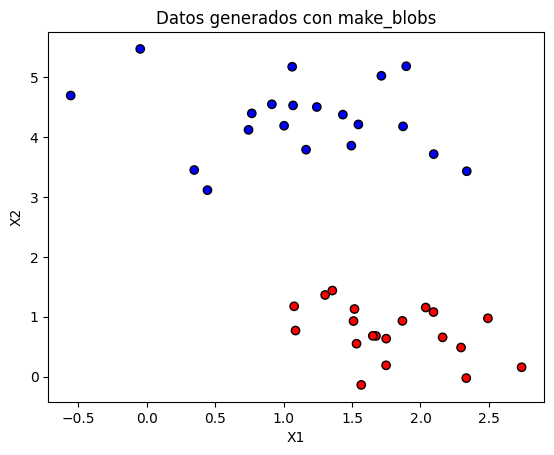

In [2]:
X, y = make_blobs(
    n_samples=40,
    centers=2,
    random_state=0,
    cluster_std=0.60
)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Datos generados con make_blobs")
plt.show()


In [3]:
Cs = [0.1, 1, 10]
models = []
for C in Cs:
    clf = LinearSVC(C=C, loss="hinge", random_state=42)
    clf.fit(X, y)
    models.append(clf)

models


[LinearSVC(C=0.1, loss='hinge', random_state=42),
 LinearSVC(C=1, loss='hinge', random_state=42),
 LinearSVC(C=10, loss='hinge', random_state=42)]

In [4]:
def get_approx_support_vectors(clf, X, tol=1e-1):
    distances = clf.decision_function(X)
    mask = np.abs(distances) <= 1 + tol
    return X[mask]


In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx = np.linspace(x_min, x_max, 50)
yy = np.linspace(y_min, y_max, 50)
YY, XX = np.meshgrid(yy, xx)
grid = np.vstack([XX.ravel(), YY.ravel()]).T


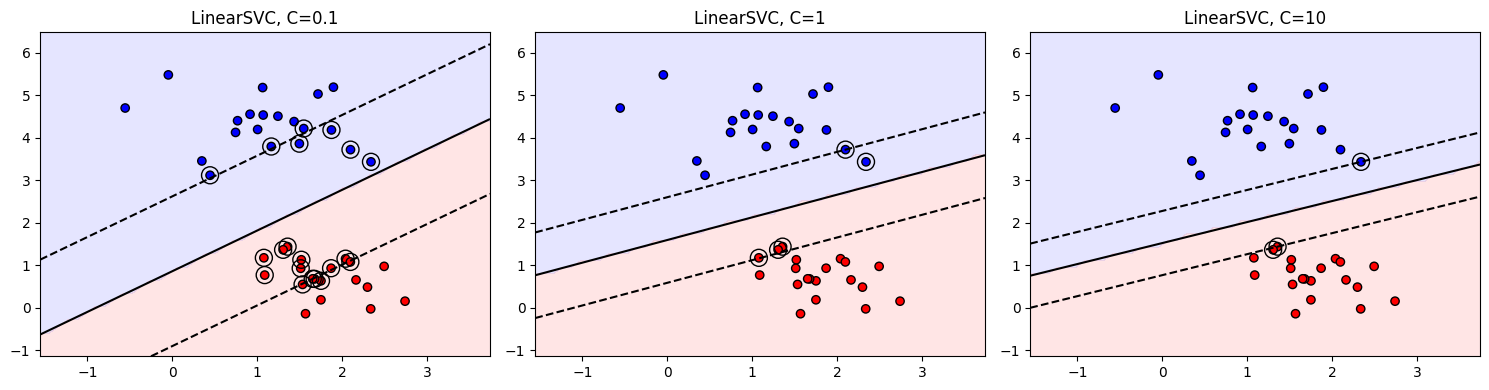

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, clf, C in zip(axes, models, Cs):
    Z = clf.decision_function(grid)
    Z = Z.reshape(XX.shape)

    ax.contourf(XX, YY, Z > 0, alpha=0.2, cmap="bwr")
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")

    sv = get_approx_support_vectors(clf, X)
    ax.scatter(sv[:, 0], sv[:, 1], s=150, facecolors="none", edgecolors="k")

    ax.set_title(f"LinearSVC, C={C}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


In [7]:
from sklearn.metrics import accuracy_score

for C, clf in zip(Cs, models):
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"C = {C}, accuracy = {acc:.2f}")


C = 0.1, accuracy = 1.00
C = 1, accuracy = 1.00
C = 10, accuracy = 1.00
